In [1]:
# importing libraries
import pandas as pd
import string
import numpy as np
import warnings

# Reading training data

In [122]:
train = pd.read_csv("train.csv")

C:\Users\HA163WN\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
train

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105466,105467,126,8,0.006620,2200,4,76831,331.0,2366.0,125.25,...,3,1.07,-0.92,0.82,0.3809,-0.5489,0,0,93,0
105467,105468,137,9,0.358568,2200,4,9836,3898.0,1106.0,135.88,...,3,0.33,-0.18,0.10,0.2357,-0.8627,1,0,93,0
105468,105469,129,9,0.241858,2200,4,627,7081.0,6577.0,128.44,...,4,1.18,-0.70,0.44,0.1649,1.0901,1,0,93,0
105469,105470,129,9,0.569719,2200,4,14629,4984.0,2101.0,127.25,...,2,0.01,0.00,0.00,0.0583,1.3355,1,0,93,0


In [124]:
train.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,...,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,...,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,...,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,...,5.000000,1.480000,-5.700000,0.740000,0.198400,-0.704275,0.000000,0.000000,19.000000,0.000000
50%,52736.000000,129.000000,9.000000,0.498267,2200.000000,4.000000,76530.000000,2292.000000,1786.000000,128.460000,...,11.000000,3.570000,-2.600000,1.990000,0.251800,0.375400,0.000000,0.000000,40.000000,0.000000
75%,79103.500000,148.000000,9.000000,0.749494,3700.000000,10.000000,80135.000000,4679.000000,3411.000000,149.080000,...,23.000000,7.700000,-1.010000,4.440000,0.283600,0.737100,1.000000,1.000000,104.000000,0.000000
max,105471.000000,176.000000,11.000000,0.999994,7900.000000,17.000000,88565.000000,9968.000000,11541.000000,172.950000,...,168.000000,58.120000,0.000000,34.040000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


# Missing value 

In [125]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 *mis_val / len(train)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns
    

In [126]:
missing_values_table(train).head(25)

,Missing Values,% of Total Values
f662,18833,17.9
f663,18833,17.9
f159,18736,17.8
f160,18736,17.8
f170,18417,17.5
f169,18417,17.5
f618,18407,17.5
f619,18407,17.5
f331,18067,17.1
f330,18067,17.1


In [127]:
train.fillna(train.mean(), inplace=True)

In [128]:
missing_values_table(train).head(25)

,Missing Values,% of Total Values
f206,1291,1.2
f207,1291,1.2
f390,698,0.7
f391,698,0.7
f626,698,0.7
f627,698,0.7
f695,698,0.7
f698,698,0.7
f138,182,0.2
f137,177,0.2


In [129]:
train.dropna(inplace=True)
missing_values_table(train).head(25)

,Missing Values,% of Total Values


In [130]:
train

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105466,105467,126,8,0.006620,2200,4,76831,331.0,2366.0,125.25,...,3,1.07,-0.92,0.82,0.3809,-0.5489,0,0,93,0
105467,105468,137,9,0.358568,2200,4,9836,3898.0,1106.0,135.88,...,3,0.33,-0.18,0.10,0.2357,-0.8627,1,0,93,0
105468,105469,129,9,0.241858,2200,4,627,7081.0,6577.0,128.44,...,4,1.18,-0.70,0.44,0.1649,1.0901,1,0,93,0
105469,105470,129,9,0.569719,2200,4,14629,4984.0,2101.0,127.25,...,2,0.01,0.00,0.00,0.0583,1.3355,1,0,93,0


# Dropping collinear features

In [131]:
def remove_collinear_features(x, threshold):
    y = x['loss']
    x = x.drop(columns = ['loss'])
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    # iterate through correlation matrix
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                print(col.values[0])
                
                drop_cols.append(col.values[0])
                
    # drop each pair of correlated columns            
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    x['loss'] = y
    
    return x

In [132]:
# remove collinear features above specified correlation coefficient

train = remove_collinear_features(train, 0.7)

f4
f9
f9
f10
f10
f17
f17
f18
f18
f20
f20
f20
f20
f21
f21
f21
f21
f22
f22
f22
f22
f22
f23
f23
f23
f23
f24
f24
f24
f24
f24
f24
f24
f27
f27
f27
f27
f27
f27
f27
f27
f28
f28
f28
f28
f28
f28
f28
f28
f29
f29
f29
f29
f29
f29
f29
f29
f29
f30
f30
f30
f30
f30
f30
f30
f30
f30
f30
f31
f32
f32
f32
f32
f32
f32
f32
f32
f32
f39
f39
f39
f39
f39
f39
f39
f39
f40
f40
f40
f40
f40
f40
f40
f40
f40
f40
f40
f41
f42
f45
f45
f45
f45
f45
f45
f45
f45
f45
f45
f45
f45


C:\Users\HA163WN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater_equal
  app.launch_new_instance()


f46
f46
f46
f46
f46
f46
f46
f46
f46
f46
f46
f46
f46
f46
f46
f47
f47
f47
f48
f48
f49
f49
f49
f49
f49
f49
f49
f49
f49
f49
f49
f49
f49
f49
f49
f49
f50
f50
f50
f50
f50
f50
f50
f50
f50
f50
f50
f50
f50
f50
f50
f50
f50
f51
f51
f51
f51
f52
f52
f52
f53
f55
f56
f57
f57
f58
f58
f58
f58
f59
f59
f59
f59
f59
f59
f59
f59
f59
f59
f59
f59
f59
f59
f59
f59
f59
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f60
f61
f61
f61
f61
f61
f61
f61
f62
f62
f62
f62
f62
f63
f63
f63
f63
f63
f63
f63
f63
f63
f63
f64
f64
f64
f64
f64
f64
f64
f64
f64
f64
f64
f64
f64
f64
f64
f65
f65
f65
f65
f65
f66
f66
f67
f68
f74
f74
f74
f74
f74
f74
f78
f79
f84
f85
f85
f85
f86
f86
f86
f87
f87
f87
f87
f88
f88
f88
f88
f88
f89
f89
f90
f90
f91
f91
f91
f94
f95
f95
f95
f95
f95
f95
f95
f96
f96
f96
f96
f96
f96
f96
f97
f97
f97
f97
f97
f97
f97
f97
f98
f98
f98
f98
f98
f98
f98
f98
f98
f99
f100
f100
f100
f101
f101
f101
f101
f105
f105
f105
f105
f105
f105
f105
f105
f105
f105
f105
f106
f106
f106
f106
f106
f106
f106
f106
f106
f106


f352
f352
f353
f353
f353
f353
f353
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f354
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f355
f356
f356
f356
f356
f356
f357
f359
f359
f359
f359
f359
f359
f359
f359
f359
f359
f359
f359
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f360
f361
f361
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f362
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f363
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364
f364


f478
f478
f478
f478
f478
f478
f478
f478
f478
f478
f478
f478
f478
f478
f478
f478
f479
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f480
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f481
f482
f482
f482
f482
f482
f482
f482
f482
f482
f482
f482
f482
f482
f482
f482
f482
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f483
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484
f484


f521
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f523
f524
f524
f524
f524
f524
f524
f524
f524
f524
f524
f524
f524
f524
f524
f524
f524
f524
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f527
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f528
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f529
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f530
f531
f531
f531
f531
f531
f531
f531
f531
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f532
f535
f535
f535
f535
f535
f535
f535
f535
f535
f535
f535
f535
f535
f538
f538
f538
f538
f538
f538
f538
f538
f538
f538
f538
f538
f538
f538
f538


f575
f575
f575
f575
f575
f575
f575
f575
f575
f575
f575
f575
f575
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f576
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f577
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f578
f579
f579
f579


f674
f674
f674
f674
f674
f675
f675
f675
f675
f675
f675
f676
f676
f676
f676
f676
f677
f677
f680
f680
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f681
f682
f682
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f683
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684
f684


f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f713
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f714
f716
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717
f717


f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f750
f751
f751
f751
f751
f751
f751
f751
f751
f751
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f752
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753
f753


In [133]:
train.shape

(103302, 229)

In [134]:
def f(r):
    if r > 0:
        return 1
    else:
        return 0
train['loss'] = train.loss.map(f)

In [135]:
train.shape

(103302, 229)

# Data Balancing

In [136]:
# Imbalance data
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [137]:
y_train = train['loss']



X_train_new, y_train_new = sm.fit_sample(train, y_train)


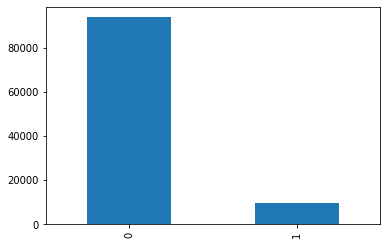

In [138]:
# observe that data was not  balanced
pd.Series(y_train).value_counts().plot.bar()

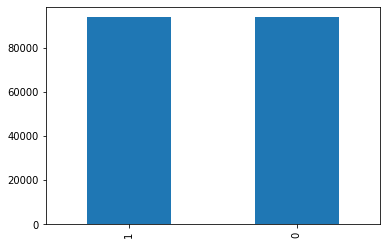

In [139]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [145]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X_train_new, y_train_new, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(149856, 229)
(37464, 229)
(149856,)
(37464,)


# Feature Scaling

In [146]:
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions -  y_test)
    
    
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape

    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))


# Machine Learning

In [153]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random.fit(X_train, y_train)
evaluate(random, X_test, y_test)

Model Performance
Average Error: 0.0033 degrees.
Accuracy = 99.35%.


In [154]:
 # Gradiente Boosting Classification
from xgboost import XGBClassifier
random_xg = XGBClassifier()
random_xg.fit(X_train, y_train)
evaluate(random_xg, X_test, y_test)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


# Conclusion

The task was to create a binary classifier for Loan default. While I started working with the dataset I realized the dataset contains lots of missing values, which I have taken care in the project. Also, the dataset was not balanced i.e. number of people defaulting (loss is zero) to number of people not defaulting(loss greater than 1) is not similar,so I balanced the data using smote. For modelling, I have used Random Forest Classifier and XGboost the accuracies seems quite good.